# INFERENTIAL STATISTICS

Örneklem ile popilasyon arasında ilişki kurmaya yarayan istatisitik çıkarımsal istatistiktir.
Çıkarımsal İstatistik deyince aklımıza güven aralığı, örneklem dağılımı, t dağılımı gibi kavramlar aklımıza gelmeli.
Çıkarımsal istatistikte hata payları ile de ilgileniyoruz.

Population --> Descriptive Statistics
Sample --> Inferential Statistics

Inferential stat.dan elde edeceğimiz verilerle population parametresini tahmin etmeye çalışıyoruz.


## Sampling Distribution:
 A sampling distribution is the probability distribution of a statistic(e.g. mean)
 
 Olası bütün ortalamaların dağılımı örneklem dağılımıdır.


## Standart Error : standart deviation of sampling distribution of the mean

onlinestatbook.com
https://onlinestatbook.com/stat_sim/samp_dist_js/index.html

# Central Limit Theorem

Popülasyon dağılımı ne olursa olsun ,yeterince büyük bir örneklem aldığınızda (n>30 olursa) örnek ortalamasının dağılımı normale yakınsar. Buna Central Limit Theorem denir.
Örenklem sayısı arttıkça normale yakınsama da artar.

## Point and Interval Estimates

Örneklem ortalaması üzerine CI (confidence interval) hesaplanır.
confidence level: %90, %95, %99 olarak alınabilir.
%95 en çok kullanılanıdır.
%95 aldığımızda alpha = 0.05 oluyor.

alpha: confidence interval'ı kaçırma olasılığı

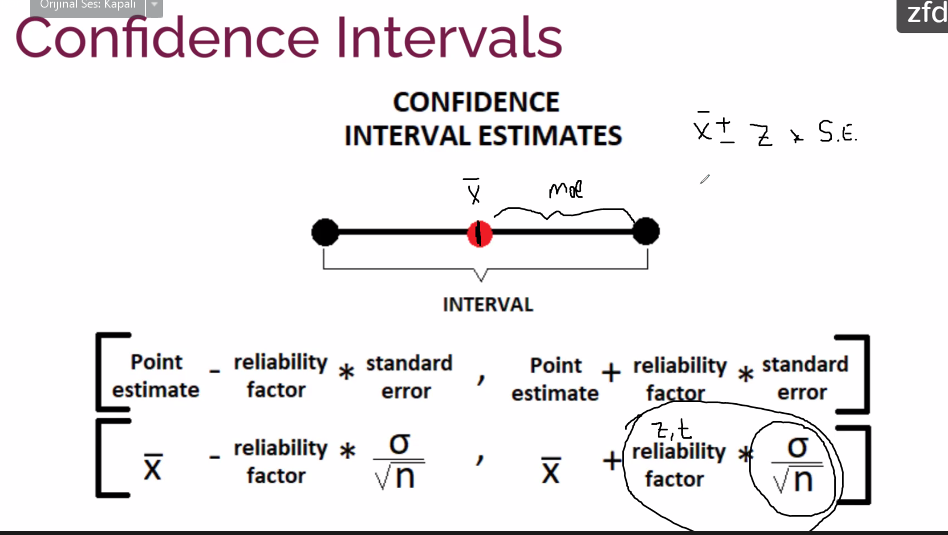

In [3]:
# CI= Xbar +_ z*SE if you know the population standart deviation you use z score

# CL=(1-alpha)

In [4]:
# CI= Xbar +_ t*SE if you dont know the population standart deviation you use t score and degree of freedom(df)

# df= sample size -1  # degree of freedom

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### Normal dağılım kullanılarak güven aralığı hesabı

In [6]:
tips = sns.load_dataset("tips")

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


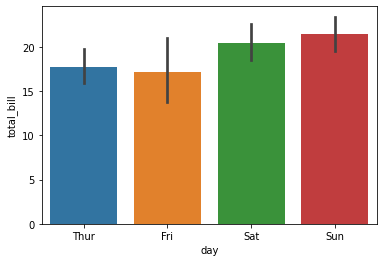

In [9]:
sns.barplot(x="day", y="total_bill", data=tips, ci=95);

In [10]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [11]:
tipsFri = tips[tips["day"] == "Fri"]
tipsFri

,total_bill,tip,sex,smoker,day,time,size
90,28.97,3.00,Male,Yes,Fri,Dinner,2
91,22.49,3.50,Male,No,Fri,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
94,22.75,3.25,Female,No,Fri,Dinner,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4
96,27.28,4.00,Male,Yes,Fri,Dinner,2
97,12.03,1.50,Male,Yes,Fri,Dinner,2
98,21.01,3.00,Male,Yes,Fri,Dinner,2
99,12.46,1.50,Male,No,Fri,Dinner,2


In [12]:
xbar=tipsFri.total_bill.mean()
xbar

17.151578947368417

In [13]:
sem = tipsFri.total_bill.sem()  # sem(standart error of mean)
sem

1.904760773479416

In [14]:
tipsFri.total_bill.std()/np.sqrt(len(tipsFri))  # sem(standart error of mean)

1.904760773479416

In [15]:
moe =  1.96 * sem  # margin of error
moe

3.7333311160196554

In [16]:
upper = xbar + moe  # CI (confidence interval) upper limit
upper

20.884910063388073

In [17]:
lower = xbar - moe  # CI (confidence interval) lower limit
lower

13.418247831348761

In [18]:
stats.norm.interval(alpha=0.95, loc=xbar, scale=sem)
# alpha : confidence level
# loc: sample mean
# scale: standart error of mean(sem)

(13.418316432184106, 20.88484146255273)

In [19]:
# tipsFri deki örnek sayısı 30'un altında olduğu için t dağılıma göre CI hesabı yapılmalı.

stats.t.interval(alpha=0.95, df=len(tipsFri)-1, loc=xbar, scale=sem)

# alpha : confidence level
# df: degree of freedom (sample size-1)
# loc: sample mean
# scale: standart error of mean(sem)

(13.149825056979093, 21.15333283775774)

In [20]:
stats.t.interval(alpha=0.95, df=len(tipsFri)-1, loc=tipsFri.total_bill.mean(), scale=tipsFri.total_bill.sem())

(13.149825056979093, 21.15333283775774)

In [21]:
tips[tips["day"]=="Sun"]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [22]:
len(tips[tips["day"]=="Sun"])

76

In [23]:
stats.norm.interval(alpha=0.95, loc=tips[tips["day"]=="Sun"].total_bill.mean(), scale=tips[tips["day"]=="Sun"].total_bill.sem())

(19.42433333097718, 23.395666669022827)

In [24]:
xbar=tips[tips["day"]=="Sun"].total_bill.mean()
xbar

21.410000000000004

In [25]:
std = tips[tips["day"]=="Sun"].total_bill.std()
std

8.832121828869889

In [26]:
sem= std/np.sqrt(len(tips[tips["day"]=="Sun"]))
sem

1.0131138555021968

In [27]:
moe = 1.96 * sem  # z score for 0.05 alpha confidence level is calculated using z(0.025) for both tail of distribution
moe

1.9857031567843058

In [28]:
upper = xbar + moe
upper

23.39570315678431

In [29]:
lower = xbar - moe
lower

19.424296843215696

In [30]:
# to find t score

#t = stats.t.ppf((1-alpha/2), degree of freedom)   # alpha is divided by 2 because we use both tail of the distribution

t = stats.t.ppf((1-0.05/2), (len(tips[tips["day"]=="Sun"])-1))
t

1.9921021536898653

In [31]:
# to find z score

# z = stats.norm.ppf(1-alpha/2)  # alpha is divided by 2 because we use both tail of the distribution

z = stats.norm.ppf(1-0.05/2)
z

1.959963984540054

In [32]:
stats.norm.ppf(0.975)  # 1-alpha/2 :0.975, alpha = 1-0.95, confidence level :0.95

1.959963984540054

In [33]:
stats.t.ppf(0.025,75) # 1-alpha/2 :0.975, alpha = 1-0.95, confidence level :0.95, 75: degree of freedom

-1.9921021536898658

In [34]:
stats.t.ppf(0.975, 75)

1.9921021536898653

In [35]:
stats.norm.ppf(0.95)

1.6448536269514722